
<a name="T_0129B07D"></a>

# <span style="color:rgb(213,80,0)">Calling Python from MATLAB</span>

### This document is a Live Script

This document is an example of a MATLAB Live Script.  Live scripts represent MathWorks' vision of the Notebook paradigm and are very tightly integrated with the MATLAB ecosytem.  While there are some differences between Live Scripts and Jupyter notebooks, there are also many similarities.  Indeed, in R2023b it will be possible to convert Live Scripts to Jupyter Notebooks!  For more details on Live Scripts, refer to [What Is a Live Script or Function? \- MATLAB & Simulink (mathworks.com)](https://www.mathworks.com/help/matlab/matlab_prog/what-is-a-live-script-or-function.html)

### **We have some Python code and want to run it in Python**

A collaborator has given us some Python code, <samp>weather.py</samp>, that imports current weather data from the web. We want to make use of it from within MATLAB.


First things first, let's check that MATLAB is cofigured with Python correctly


In [1]:
pyenv

ans = 
  PythonEnvironment with properties:
          Version: "3.10"
       Executable: "/opt/conda/bin/python3"
          Library: "/opt/conda/lib/libpython3.10.so"
             Home: "/opt/conda"
           Status: Loaded
    ExecutionMode: InProcess
        ProcessID: "469"
      ProcessName: "MATLAB"


We can take a quick look at weather.py inside this live script which simply displays any text file


In [2]:
type weather.py

# -*- coding: utf-8 -*-
'''
Created on Thu Jan  4 20:41:45 2018
Modified Jan 29 2019
Simplified June 16 2022
'''
# weather.py
import datetime
import json  
import urllib.request
BASE_URL = '/data/2.5/{}?q={},{}&appid={}'
def get_current_weather(city, country, apikey,**kwargs):  
    '''get current conditions in specified location
    appid='b1b15e88fa797225412429c1c50c122a1'
    get_current_weather('London','uk',appid,api='samples')'''
    # select between samples or prod api
    if 'api' in kwargs:
        if kwargs['api'] == 'samples':
            DOMAIN = "http://samples.openweathermap.org"
        else:
            print('not the right api arg')
            DOMAIN = "http://api.openweathermap.org"
    else:
        DOMAIN = "http://api.openweathermap.org"
    # Read current conditions
    try:
        # url = 'http://samples.openweathermap.org/data/2.5/weather?q=London,uk&appid=b1b15e88fa797225412429c1c50c122a1'
        url = DOMAIN + BASE_URL.format('weather',city,country,apikey)



For a fuller featured experience, open in MATLAB editor


In [3]:
edit weather.py


This investigation shows us that we can run weather.py as a script!  The easiest way to do that inside MATLAB is with the <samp>pyrunfile</samp> command


In [4]:
pyrunfile("weather.py")

Running weather.py as a script
Getting current weather for London
{'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 280.32, 'pressure': 1012, 'humidity': 81, 'temp_min': 279.15, 'temp_max': 281.15}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1485789600, 'sys': {'type': 1, 'id': 5091, 'message': 0.0103, 'country': 'GB', 'sunrise': 1485762037, 'sunset': 1485794875}, 'id': 2643743, 'name': 'London', 'cod': 200}


The problem with this approach is that nothing is returned back to MATLAB that we can use in subsequent calcuations.  In some cases, this is fine.  For example, perhaps your Python script produces a file that we can later load into MATLAB.


In this case, however, we need to use a different approach and call the Python functions directly from MATLAB.


**Calling Python functions from MATLAB**


Just add <samp>py.</samp> to call functions from Python.  Here's how to call the  <samp>sqrt</samp> function from Python's <samp>math</samp> module.


In [5]:
py.math.sqrt(42)

ans = 6.4807


Calling a numpy function is just as easy. Let's first generate a 3x3 magic square in MATLAB


In [6]:
a=magic(3)

a = 3x3    
     8     1     6
     3     5     7
     4     9     2


and compute the QR decomposition in numpy


In [7]:
pyQR = py.numpy.linalg.qr(a)

pyQR = 
  Python QRResult with properties:
    Q
    R
    QRResult(Q=array([[-0.8479983 ,  0.52229204,  0.09005497],
           [-0.31799936, -0.36546806, -0.8748197 ],
           [-0.42399915, -0.77048304,  0.47600483]]), R=array([[-9.43398113, -6.25398749, -8.16198368],
           [ 0.        , -8.23939564, -0.96549025],
           [ 0.        ,  0.        , -4.63139839]]))


A little extra work is required to get the individual matrices from that result


In [8]:
pyQ = pyQR.Q

pyQ = 
  Python ndarray:
   -0.8480    0.5223    0.0901
   -0.3180   -0.3655   -0.8748
   -0.4240   -0.7705    0.4760
    Use details function to view the properties of the Python object.
    Use double function to convert to a MATLAB array.

In [9]:
pyR = pyQR.R

pyR = 
  Python ndarray:
   -9.4340   -6.2540   -8.1620
         0   -8.2394   -0.9655
         0         0   -4.6314
    Use details function to view the properties of the Python object.
    Use double function to convert to a MATLAB array.


You can see that its easy to use whatever Python functions you have installed from within MATLAB.


Let's now use MATLAB's <samp>qr</samp> function to directly as a comparison


In [10]:
[Q,R] = qr(a)

Q = 3x3    
   -0.8480    0.5223    0.0901
   -0.3180   -0.3655   -0.8748
   -0.4240   -0.7705    0.4760
R = 3x3    
   -9.4340   -6.2540   -8.1620
         0   -8.2394   -0.9655
         0         0   -4.6314



Use MATLAB <samp>name=value</samp> syntax for Python named arguments.


In [11]:
hw = py.textwrap.wrap("Hello world!", width = 2)


This failed because python is often more strict than MATLAB about data types.


In [12]:
hw = py.textwrap.wrap("Hello world!", width = int32(2))

hw = 
  Python list with values:
    ['He', 'll', 'o ', 'wo', 'rl', 'd!']
    Use string, double or cell function to convert to a MATLAB array.


Convert to appropriate MATLAB type, if desired.


In [13]:
hw = string(hw)

hw = 1x6 string    
"He"         "ll"         "o "         "wo"         "rl"         "d!"

<a name="H_6BB1C969"></a>

## Read weather data using Python module
<p style="text-align:left">
   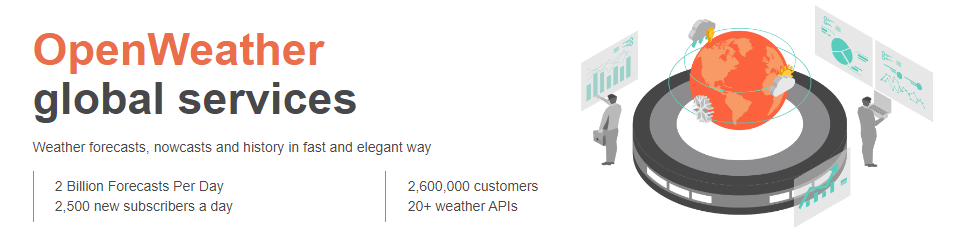
</p>


The weather.py module reads and parses current weather data from the web API: [https://openweathermap.org/api](https://openweathermap.org/api)


First, get the access key for the weather API.


In [14]:
% apikey = readtable("accessKey.txt","TextType","string");


Or use the sample API key


In [15]:
appid ='b1b15e88fa797225412429c1c50c122a1';


Use the weather.py module to get the air quality for London. This is a user\-defined Python module which includes functions to read and parse the current and forecasted weather data by location.


In [16]:
jsonData = py.weather.get_current_weather("London","UK",appid,api='samples')

jsonData = 
  Python dict with no properties.
    {'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 280.32, 'pressure': 1012, 'humidity': 81, 'temp_min': 279.15, 'temp_max': 281.15}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1485789600, 'sys': {'type': 1, 'id': 5091, 'message': 0.0103, 'country': 'GB', 'sunrise': 1485762037, 'sunset': 1485794875}, 'id': 2643743, 'name': 'London', 'cod': 200}


Parse the json data returned from the weather API.


In [17]:
weatherData = py.weather.parse_current_json(jsonData)

weatherData = 
  Python dict with no properties.
    {'temp': 280.32, 'pressure': 1012, 'humidity': 81, 'temp_min': 279.15, 'temp_max': 281.15, 'speed': 4.1, 'deg': 80, 'lon': -0.13, 'lat': 51.51, 'city': 'London', 'current_time': '2023-06-21 21:53:56.301071'}

<a name="H_03C0FC7F"></a>

## Preprocess data

The **Python dictionary** can be represented as a **MATLAB struct**.


In [18]:
data = struct(weatherData)

data = struct with fields:
            temp: 280.3200
        pressure: [1x1 py.int]
        humidity: [1x1 py.int]
        temp_min: 279.1500
        temp_max: 281.1500
           speed: 4.1000
             deg: [1x1 py.int]
             lon: -0.1300
             lat: 51.5100
            city: [1x6 py.str]
    current_time: [1x26 py.str]


Convert the remaining python types to the desired MATLAB data types.


In [19]:
string(data.city)

ans = "London"


Perform the remaining conversions using the custom <samp>convertData</samp> function (see the end of this Script)


In [20]:
convertData(data)

<a name="H_17AF6CED"></a>

## Handle timeseries with the weather forecast

Now let's look at the weather forecast for this week in Munich.


In [21]:
jsonData = py.weather.get_forecast('Muenchen','DE',appid,api='samples');
forecastData = py.weather.parse_forecast_json(jsonData);
forecast = struct(forecastData)

forecast = struct with fields:
    current_time: [1x36 py.list]
            temp: [1x36 py.list]
             deg: [1x36 py.list]
           speed: [1x36 py.list]
        humidity: [1x36 py.list]
        pressure: [1x36 py.list]


The type of data returned by the parsed forecast date is a **Python array**:


In [22]:
forecast.temp

ans = 
  Python list with values:
    [286.67, 285.66, 277.05, 272.78, 273.341, 275.568, 276.478, 276.67, 278.253, 276.455, 275.639, 275.459, 275.035, 274.965, 274.562, 275.648, 277.927, 278.367, 273.797, 271.239, 269.553, 268.198, 267.295, 272.956, 277.422, 277.984, 272.459, 269.473, 268.793, 268.106, 267.655, 273.75, 279.302, 279.343, 274.443, 272.424]
    Use string, double or cell function to convert to a MATLAB array.


Convert to a MATLAB double array (and from Kelvin to Celsius)


In [23]:
temp = double(forecast.temp) - 273.15

temp = 1x36    
   13.5200   12.5100    3.9000   -0.3700    0.1910    2.4180    3.3280    3.5200    5.1030    3.3050    2.4890    2.3090    1.8850    1.8150    1.4120    2.4980    4.7770    5.2170    0.6470   -1.9110   -3.5970   -4.9520   -5.8550   -0.1940    4.2720    4.8340   -0.6910   -3.6770   -4.3570   -5.0440   -5.4950    0.6000    6.1520    6.1930    1.2930   -0.7260


Current time is a list of strings.


In [24]:
forecast.current_time

ans = 
  Python list with values:
    ['2017-02-16 12:00:00', '2017-02-16 15:00:00', '2017-02-16 18:00:00', '2017-02-16 21:00:00', '2017-02-17 00:00:00', '2017-02-17 03:00:00', '2017-02-17 06:00:00', '2017-02-17 09:00:00', '2017-02-17 12:00:00', '2017-02-17 15:00:00', '2017-02-17 18:00:00', '2017-02-17 21:00:00', '2017-02-18 00:00:00', '2017-02-18 03:00:00', '2017-02-18 06:00:00', '2017-02-18 09:00:00', '2017-02-18 12:00:00', '2017-02-18 15:00:00', '2017-02-18 18:00:00', '2017-02-18 21:00:00', '2017-02-19 00:00:00', '2017-02-19 03:00:00', '2017-02-19 06:00:00', '2017-02-19 09:00:00', '2017-02-19 12:00:00', '2017-02-19 15:00:00', '2017-02-19 18:00:00', '2017-02-19 21:00:00', '2017-02-20 00:00:00', '2017-02-20 03:00:00', '2017-02-20 06:00:00', '2017-02-20 09:00:00', '2017-02-20 12:00:00', '2017-02-20 15:00:00', '2017-02-20 18:00:00', '2017-02-20 21:00:00']
    Use string, double or cell function to convert to a MATLAB array.


Convert to a MATLAB string, and then to a MATLAB datetime:


In [25]:
time = datetime(string(forecast.current_time))

time = 1x36 datetime    
16-Feb-2017 12:00:0016-Feb-2017 15:00:0016-Feb-2017 18:00:0016-Feb-2017 21:00:0017-Feb-2017 00:00:0017-Feb-2017 03:00:0017-Feb-2017 06:00:0017-Feb-2017 09:00:0017-Feb-2017 12:00:0017-Feb-2017 15:00:0017-Feb-2017 18:00:0017-Feb-2017 21:00:0018-Feb-2017 00:00:0018-Feb-2017 03:00:0018-Feb-2017 06:00:0018-Feb-2017 09:00:0018-Feb-2017 12:00:0018-Feb-2017 15:00:0018-Feb-2017 18:00:0018-Feb-2017 21:00:0019-Feb-2017 00:00:0019-Feb-2017 03:00:0019-Feb-2017 06:00:0019-Feb-2017 09:00:0019-Feb-2017 12:00:0019-Feb-2017 15:00:0019-Feb-2017 18:00:0019-Feb-2017 21:00:0020-Feb-2017 00:00:0020-Feb-2017 03:00:00


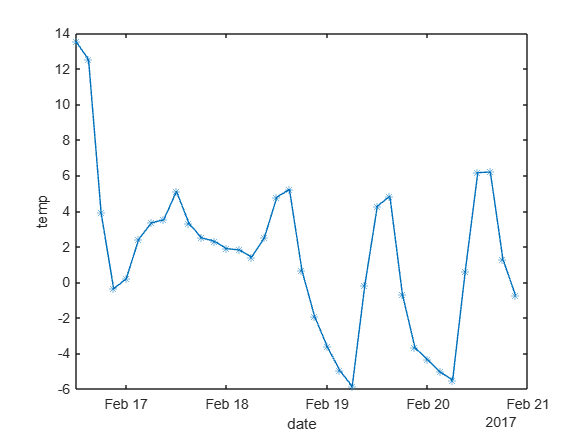

In [26]:
plot(time,temp,'-*')
xlabel("date")
ylabel("temp")

<a name="H_DB0B277F"></a>

## Retime and smooth data using Live Editor Tasks

Weather forecasts are only provided every 3 hours. We want to retime to have data interpolated every single hour.


In [27]:
T = timetable(time',temp','VariableNames',{'Temperature'})

In [28]:
% Use Retime livescript here. Every hour. Linear interpolation


In [29]:
% Use smooth data here. Moving mean smoothing method. Smoothing factor 0.25


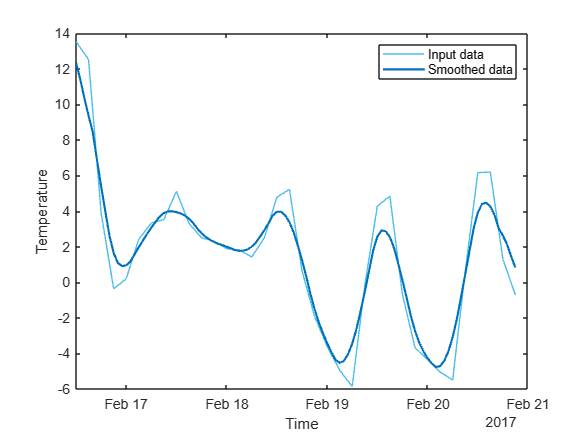

In [30]:
% Smooth input data
newTable = smoothdata(newTimetable2,"movmean","SmoothingFactor",0.25);

% Display results
figure
plot(newTimetable2.Time,newTimetable2.Temperature,"Color",[77 190 238]/255,...
    "DisplayName","Input data")
hold on
plot(newTimetable2.Time,newTable.Temperature,"Color",[0 114 189]/255,...
    "LineWidth",1.5,"DisplayName","Smoothed data")
hold off
legend
ylabel("Temperature")
xlabel("Time")

<a name="H_D40CFE8F"></a>

## Predict air quality

The machine learning model has been trained and validated on a large amount of historical climate data. The model is then saved as a .mat file for use in production.


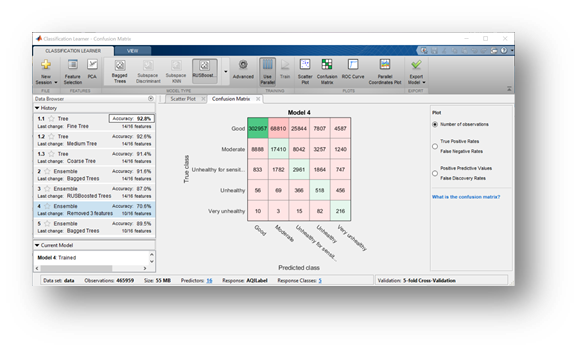


Use a function (<samp>prepData.m</samp>) to convert and prepare data for machine learning (create a table with the expected variable names, preprocessing steps, etc).


In [31]:
currentData = prepData(weatherData)


Use the model to predict the air quality for the new weather data.


'*airQualModel.mat*' contains a pre\-trained Bagged Classification Tree/ "Random Forest" classification network. The network was trained using a large data set stored on a local HDFS cluster (~1TB of historical weather data) and required the use of the "tall" MATLAB datatype.  The model was saved as a \*.mat file for use in predicting air quality in this demonstration.


In [32]:
load airQualModel model

In [33]:
airQual = predict(model,currentData)

airQual = categorical
     Good


**Helper Functions**


In [34]:
function data = convertData(data)
% Organize and convert data types
data = struct2table(data);
% Check for wind direction (deg), sometimes missing
if ~any(data.Properties.VariableNames == "deg")
    deg = "";
    data = addvars(data,deg,'After','speed');
end
data = removevars(data,["temp_min","temp_max"]);
data.Properties.VariableNames([1:5,end]) = ["T","P","RH","WindSpd","WindDir","DateLocal"];
data = convertvars(data,["T","P","RH","WindSpd","WindDir"],"double");
data = convertvars(data,["city","DateLocal"],"string");

% Convert date
if strlength(data.DateLocal) > 20
    data.DateLocal = datetime(data.DateLocal,"InputFormat","uuuu-MM-dd HH:mm:ss.SSS");
else
    data.DateLocal = datetime(data.DateLocal);
end

end